# <b><div style='padding:8px;background-color:#003f88;color:white;border-radius:2px;font-size:100%;text-align: left'>Marketing Campaign </div></b>

## **Project Overview**

This project delivers a comprehensive, end-to-end analysis of marketing performance, customer behavior, product trends, and financial risk using transactional and campaign-level data. The objective is to enable data-driven decision-making by identifying the most profitable marketing campaigns and acquisition channels, uncovering best-selling and trending products, segmenting customers based on behavior and demographics, and evaluating financial performance and risks.

Using order, customer, product, acquisition source, and payment data, the analysis combines descriptive, diagnostic, and predictive analytics to uncover actionable insights. The project emphasizes business impact by translating analytical results into strategic recommendations for marketing optimization, revenue growth, customer targeting, and financial risk management. Executive-ready dashboards and visualizations are developed to communicate insights clearly to both technical and non-technical stakeholders.

---

## **Project Objectives**

The primary objectives of this project are to:

### 1. Analyze Customer Acquisition Source Performance

 * Evaluate acquisition sources based on order volume, revenue, and profit contribution.

### 2. Measure Marketing Profitability

* Calculate revenue, cost, and profit margins by acquisition source, product category, and region.

### 3. Identify Best-Selling and High-Revenue Products

* Determine top-performing product categories using sales volume, revenue, and profit metrics.

### 4. Analyze Product Sales Trends Over Time

* Examine temporal sales patterns by product category and region using order date data.

### 5. Segment Customers Based on Transactional Behavior

* Segment customers using purchase frequency, spending patterns, acquisition source, and geographic attributes.

### 6. Evaluate Financial Performance and Revenue Distribution

* Analyze transaction volumes, revenue streams, and profitability across products, regions, and customer segments

### 7. Assess Fraud and Payment Risk Patterns

* Analyze fraud incidence across payment methods, card types, regions, and acquisition sources using available fraud indicators.


### 8. Conversion Rate and CAC Analysis

* Analyze conversion rates and Customer Acquisition Costs (CAC) for each acquisition source to determine the most efficient source for budget allocation

## **Data Description**

The dataset contains transactional, customer, product, marketing, and payment information designed to support end-to-end analysis of marketing performance, customer behavior, product trends, financial outcomes, and risk indicators. Each record represents an order line item associated with a customer transaction, enriched with acquisition source and payment attributes.

The data enables descriptive, diagnostic, and predictive analytics across multiple business domains, including marketing effectiveness, customer segmentation, sales performance, and financial risk management.

---

## **Dataset Structure**

The dataset consists of the following key dimensions:

* **Order Information:** Tracks individual orders and purchase details.
* **Customer Information:** Identifies customers and basic demographics.
* **Product Information:** Describes products, categories, and pricing.
* **Marketing Information:** Captures customer acquisition channels.
* **Financial & Payment Information:** Supports revenue, cost, and fraud analysis.
* **Geographic Information:** Enables regional and country-level insights.

---

## **Data Dictionary**

| Column Name           | Description                                                                    |
| --------------------- | ------------------------------------------------------------------------------ |
| **OrderID**           | Unique identifier for each customer order                                      |
| **Region**            | Geographic region where the order was placed                                   |
| **Country**           | Country associated with the customer or transaction                            |
| **CustID**            | Unique identifier for each customer                                            |
| **Customer_Name**     | Name of the customer                                                           |
| **ProductSKU**        | Unique stock-keeping unit identifying a product                                |
| **Product_Category**  | Category to which the product belongs                                          |
| **OrderLineItem**     | Line item identifier within an order                                           |
| **OrderQuantity**     | Number of units purchased in the order line                                    |
| **ProductCost**       | Cost incurred by the business per unit of the product                          |
| **ProductPrice**      | Selling price per unit of the product                                          |
| **OrderDate**         | Date the order was placed                                                      |
| **AcquisitionSource** | Marketing or acquisition channel through which the customer was acquired       |
| **TransactionID**     | Unique identifier for the payment transaction                                  |
| **Fraud**             | Indicator flag specifying whether the transaction was identified as fraudulent |
| **PaymentMethod**     | Method used for payment (e.g., card, transfer, digital wallet)                 |
| **CardType**          | Type of card used for payment (if applicable)                                  |
| **Gender**            | Customer gender                                                                |

---

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set visualization styles
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8,6)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Extraction and Cleaning

In [2]:
# Load dataset
data = pd.read_csv(r"C:\Users\Harrison\Desktop\Meriskill\data\order_data.csv")

# Preview
data.head()

,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,AcquisitionSource,TransactionID,Fraud,PaymentMethod,CardType,Gender
0,SO45080,Northwest,United States,14657,JOHN THOMAS,BK-R50B-58,Plants,1,1.0,413.1463,699.0982,01-01-2020,Meta-ads\r,I4127227587819694,False,CREDITCARD,DISCOVER,M
1,SO45079,Southwest,United States,29255,KYLE WASHINGTON,BK-R93R-48,Plants,1,1.0,2171.2942,3578.27,01-01-2020,Google-ads\r,E9525730529761877,False,CREDITCARD,MC,M
2,SO45082,Australia,Australia,11455,ROSS SANZ,BK-M82B-44,Plants,1,1.0,1898.0944,3374.99,01-01-2020,Google-ads\r,Z6376643485803420,False,CREDITCARD,VISA,M
3,SO45081,Canada,Canada,26782,SETH LEWIS,BK-R50B-44,Plants,1,1.0,413.1463,699.0982,01-01-2020,Google-ads\r,R8609290025411138,False,CREDITCARD,VISA,M
4,SO45083,United Kingdom,United Kingdom,14947,ALEJANDRO CHEN,BK-R93R-48,Plants,1,1.0,2171.2942,3578.27,02-01-2020,Meta-ads\r,Y9572700698484288,False,CREDITCARD,VISA,M


In [3]:
# Check data info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55910 entries, 0 to 55909
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OrderID            55910 non-null  object 
 1   Region             55910 non-null  object 
 2   Country            55910 non-null  object 
 3   CustID             55910 non-null  object 
 4   Customer_Name      55907 non-null  object 
 5   ProductSKU         55910 non-null  object 
 6   Product_Category   55910 non-null  object 
 7   OrderLineItem      55910 non-null  int64  
 8   OrderQuantity      55910 non-null  float64
 9   ProductCost        55910 non-null  float64
 10  ProductPrice       55910 non-null  object 
 11  OrderDate          55910 non-null  object 
 12  AcquisitionSource  55909 non-null  object 
 13  TransactionID      55910 non-null  object 
 14  Fraud              55207 non-null  object 
 15  PaymentMethod      55910 non-null  object 
 16  CardType           506

In [4]:
# Check data shape
data.shape

(55910, 18)

The dataset contains 55,910 rows and 18 columns

In [5]:
# Check the data type
data.dtypes

OrderID               object
Region                object
Country               object
CustID                object
Customer_Name         object
ProductSKU            object
Product_Category      object
OrderLineItem          int64
OrderQuantity        float64
ProductCost          float64
ProductPrice          object
OrderDate             object
AcquisitionSource     object
TransactionID         object
Fraud                 object
PaymentMethod         object
CardType              object
Gender                object
dtype: object

ProductPrice, OrderDate, and Fraud  has the wrong datatype

In [6]:
# correct the data types of ProductPrice, OrderDate, and Fraud  to their correct datatypes
data['ProductPrice'] = pd.to_numeric(data['ProductPrice'], errors='coerce')  # Convert ProductPrice to numeric
data['OrderDate'] = pd.to_datetime(data['OrderDate'], errors='coerce')  # Convert OrderDate to datetime
data['Fraud'] = data['Fraud'].astype(bool)  # Convert Fraud to boolean

# Check the updated datatypes
print(data.dtypes)


OrderID                      object
Region                       object
Country                      object
CustID                       object
Customer_Name                object
ProductSKU                   object
Product_Category             object
OrderLineItem                 int64
OrderQuantity               float64
ProductCost                 float64
ProductPrice                float64
OrderDate            datetime64[ns]
AcquisitionSource            object
TransactionID                object
Fraud                          bool
PaymentMethod                object
CardType                     object
Gender                       object
dtype: object


In [7]:
# Check for duplicate
data.duplicated().any().sum()

0

There are no duplicates in our dataset

In [8]:
# Check the number unique values in each features
data.nunique()

OrderID              25108
Region                  10
Country                  6
CustID               20524
Customer_Name        17312
ProductSKU             131
Product_Category         4
OrderLineItem            8
OrderQuantity            4
ProductCost             42
ProductPrice            40
OrderDate              360
AcquisitionSource        3
TransactionID        42889
Fraud                    2
PaymentMethod            2
CardType                 5
Gender                   7
dtype: int64

In [9]:
# Check for unique values in gender
data["Gender"].unique()


array(['M', nan, 'X', 'P', 'N', 'U', 'Y', 'S'], dtype=object)

In [10]:
# Define a mapping for Gender corrections
gender_mapping = {
    'M': 'Male',
    'F': 'Female',
    # Map all other values to 'Female'
    'X': 'Female', 'P': 'Female', 'N': 'Female', 
    'U': 'Female', 'Y': 'Female', 'S': 'Female'
}

# Apply the mapping
data['Gender'] = data['Gender'].map(gender_mapping).fillna('Female')

# Check the corrected value counts
print(data['Gender'].value_counts())


Gender
Male      48866
Female     7044
Name: count, dtype: int64


In [11]:
# Check for missing values
missing_values = data.isnull().sum()

# Calculate the percentage of missing data in each column
missing_percentage = (missing_values / len(data)) * 100

# Display the missing data statistics
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 OrderID                  0
Region                   0
Country                  0
CustID                   0
Customer_Name            3
ProductSKU               0
Product_Category         0
OrderLineItem            0
OrderQuantity            0
ProductCost              0
ProductPrice             1
OrderDate            33689
AcquisitionSource        1
TransactionID            0
Fraud                    0
PaymentMethod            0
CardType              5223
Gender                   0
dtype: int64

Percentage of Missing Data:
 OrderID               0.000000
Region                0.000000
Country               0.000000
CustID                0.000000
Customer_Name         0.005366
ProductSKU            0.000000
Product_Category      0.000000
OrderLineItem         0.000000
OrderQuantity         0.000000
ProductCost           0.000000
ProductPrice          0.001789
OrderDate            60.255768
AcquisitionSource     0.001789
TransactionID         0.000000
Fraud

The dataset contains missing values in several columns:
- Customer_Name: 3 missing values
- ProductPrice : 1 missing value
- OrderDate: 33,689 missing values (60%)
- AcquisitionSource: 1 missing value
- CardType: 5223 missing values

We'll handle these missing values using appropriate strategies. Here are the common approaches we can use:

For categorical variables, we can impute missing values with the mode.
For numerical variables, we can impute missing values with the mean or median.

In [12]:
# Impute missing values for categorical variables with the mode
for column in ['Customer_Name', 'AcquisitionSource', 'CardType']:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Impute missing values for numerical variables with the median
data['ProductPrice'].fillna(data['ProductPrice'].median(), inplace=True)

# Impute missing values for OrderDate (datetime64)
data['OrderDate'].fillna(data['OrderDate'].median(), inplace=True)

# Verify that there are no missing values left
cleaned_data = data.isnull().sum()
print(cleaned_data)

OrderID              0
Region               0
Country              0
CustID               0
Customer_Name        0
ProductSKU           0
Product_Category     0
OrderLineItem        0
OrderQuantity        0
ProductCost          0
ProductPrice         0
OrderDate            0
AcquisitionSource    0
TransactionID        0
Fraud                0
PaymentMethod        0
CardType             0
Gender               0
dtype: int64


In [13]:
# View row where OrderID = SO52614
data[data['OrderID'] == 'SO52614']


,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,AcquisitionSource,TransactionID,Fraud,PaymentMethod,CardType,Gender
7465,SO52614,France,France,21033,PRESTON SUBRAM,WB-H098,Plant Care & Seeds,2,2.0000,1.8663,4.99,2022-01-04,Google-ads\r,V6601748662689166,False,CREDITCARD,MC,Male
7466,SO52614,France,France,R,WB-H098,Plant Care & Seeds,3,2,1.8663,4.9900,29.99,2022-01-04,Google-ads\r,E3514276256212068,False,CREDITCARD,VISA,Male


In [14]:
# View the row that matches the condition
row_to_view = data[(data['OrderID'] == 'SO52614') & (data['CustID'] == 'R')]
print("Row to drop:")
print(row_to_view)

#  Drop the row(s) using boolean indexing
data = data[~((data['OrderID'] == 'SO52614') & (data['CustID'] == 'R'))]

# check if the row is gone
print("\nAfter dropping, check if row exists:")
print(data[(data['OrderID'] == 'SO52614') & (data['CustID'] == 'R')])

Row to drop:
      OrderID  Region Country CustID Customer_Name          ProductSKU  \
7466  SO52614  France  France      R       WB-H098  Plant Care & Seeds   

     Product_Category  OrderLineItem  OrderQuantity  ProductCost  \
7466                3              2         1.8663         4.99   

      ProductPrice  OrderDate AcquisitionSource      TransactionID  Fraud  \
7466         29.99 2022-01-04      Google-ads\r  E3514276256212068  False   

     PaymentMethod CardType Gender  
7466    CREDITCARD     VISA   Male  

After dropping, check if row exists:
Empty DataFrame
Columns: [OrderID, Region, Country, CustID, Customer_Name, ProductSKU, Product_Category, OrderLineItem, OrderQuantity, ProductCost, ProductPrice, OrderDate, AcquisitionSource, TransactionID, Fraud, PaymentMethod, CardType, Gender]
Index: []


In [15]:
# Verify
data.loc[data['OrderID'] == 'SO52614']


,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,AcquisitionSource,TransactionID,Fraud,PaymentMethod,CardType,Gender
7465,SO52614,France,France,21033,PRESTON SUBRAM,WB-H098,Plant Care & Seeds,2,2.0,1.8663,4.99,2022-01-04,Google-ads\r,V6601748662689166,False,CREDITCARD,MC,Male


In [16]:
# Handle whitespace in column names and string entries
data.columns = data.columns.str.strip()
data['AcquisitionSource'] = data['AcquisitionSource'].str.strip()


In [17]:
# Verify
data['AcquisitionSource'].value_counts()

AcquisitionSource
Google-ads     44649
Yt-Campaign     5642
Meta-ads        5618
Name: count, dtype: int64

In [18]:
# statistical info
data.describe()


,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate
count,55909.000000,55909.000000,55909.000000,55909.000000,55909
mean,1.903236,1.501601,256.147594,439.638111,2021-12-27 11:58:00.233951488
min,1.000000,1.000000,0.856500,2.290000,2020-01-01 00:00:00
25%,1.000000,1.000000,2.973300,7.950000,2022-01-04 00:00:00
50%,2.000000,1.000000,11.216300,29.990000,2022-01-04 00:00:00
75%,2.000000,2.000000,59.466000,159.000000,2022-01-04 00:00:00
max,8.000000,3.000000,2171.294200,3578.270000,2022-12-06 00:00:00
std,1.021295,0.612308,496.566405,839.267444,NaN


**The dataset contains 55,909 order line items** with diverse product pricing and ordering patterns. Key insights reveal:

**Order Patterns:** Most orders contain 1-2 line items (mean: 1.9, median: 2.0), with customers typically purchasing 1-2 units per line item (mean: 1.5, median: 1.0). The maximum of 8 line items and 3 units suggests occasional bulk purchases, but single-item orders dominate.

**Pricing Structure:** Product costs range from 0.86 to 2,171, with high variability (std: 496.57) indicating a diverse product portfolio from low-cost accessories to premium items. The median cost of 11.22 and the price of 29.99 suggest most products are low-to-mid range. Product prices show even greater spread (2.29 to 3,578, std: $839), with a 3.67x average markup from cost to price across the catalog.

**Temporal Distribution:** Orders span from January 2020 to December 2022, with extreme concentration around January 4, 2022 (25th, 50th, and 75th percentiles all fall on this date). This unusual clustering indicates either a major sales event, data collection anomaly, or bulk order processing on that specific date—consistent with the revenue spike observed in the monthly trends analysis.

## **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis is a crucial step in any data analysis project. As part of our EDA, we shall provide solutions to the project objectives, and visualize them to gain insigths.

### 1. Analyze Customer Acquisition Source Performance
- Evaluate acquisition sources based on order volume, revenue, and profit contribution.

In [19]:
data.sample(3)

,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,AcquisitionSource,TransactionID,Fraud,PaymentMethod,CardType,Gender
6765,SO52326,Northwest,United States,21602,MANUEL MALHOTRA,BK-R19B-48,Plants,1,1.0,343.6496,539.99,2021-09-08,Yt-Campaign,B9033284678961023,False,PAYPAL,VISA,Male
35428,SO65136,United Kingdom,United Kingdom,28697,RAQUEL GUTIERREZ,BK-T79Y-46,Plants,1,1.0,1481.9379,2384.07,2022-01-03,Google-ads,T5066282440389224,False,CREDITCARD,VISA,Female
24909,SO60530,Germany,Germany,14990,NELSON RAMOS,BK-M18S-52,Plants,1,1.0,308.2179,564.99,2022-01-04,Google-ads,H1259685985643733,False,CREDITCARD,VISA,Male


In [20]:
# Create derived columns
data['Revenue'] = data['ProductPrice'] * data['OrderQuantity']   # Revenue per order line
data['Cost'] = data['ProductCost'] * data['OrderQuantity']       # Cost per order line
data['Profit'] = data['Revenue'] - data['Cost']                  # Profit per order line


  AcquisitionSource  Orders  Customers       Revenue        Profit
0        Google-ads   23047      19239  1.984020e+07  8.328057e+06
1          Meta-ads    5134       4905  2.572408e+06  1.079291e+06
2       Yt-Campaign    5161       4921  2.478366e+06  1.039928e+06


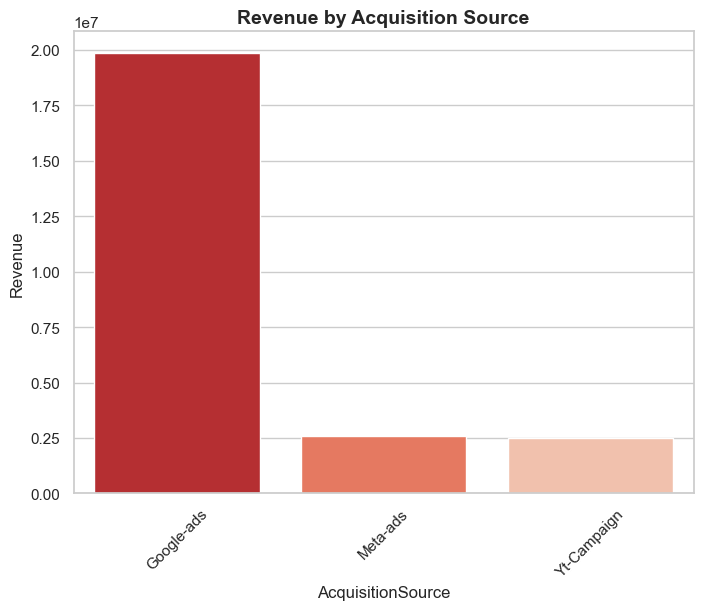

In [21]:
# Customer Acquisition Source Performance
# ----------------------------
acquisition_summary = data.groupby('AcquisitionSource').agg(
    Orders=('OrderID','nunique'),
    Customers=('CustID','nunique'),
    Revenue=('Revenue','sum'),
    Profit=('Profit','sum')
).sort_values('Revenue', ascending=False).reset_index()

print(acquisition_summary)

# Visualization
sns.barplot(data=acquisition_summary, x='AcquisitionSource', y='Revenue', palette='Reds_r')
plt.title('Revenue by Acquisition Source', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


>From our analysis, Google-ads dominates revenue generation, accounting for approximately 19.8 million—nearly 8x more than Meta-ads (2.6M) and Yt-Campaign ($2.5M) combined. This massive disparity indicates that Google-ads is the primary revenue driver for the business, contributing roughly 80% of total acquisition revenue. While Meta-ads and Yt-Campaign show similar performance to each other, Google-ads clearly outperforms as the most financially impactful marketing channel, making it critical for continued investment and optimization.

### 2. Measure Marketing Profitability
- Calculate revenue, cost, and profit margins by acquisition source, product category, and region.

In [22]:
# Preview data
data.sample(3)


,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,...,OrderDate,AcquisitionSource,TransactionID,Fraud,PaymentMethod,CardType,Gender,Revenue,Cost,Profit
869,SO46232,Southwest,United States,12058,CHLOE NELSON,BK-R93R-44,Plants,1,1.0,2171.2942,...,2022-01-04,Google-ads,R1354152249214110,False,CREDITCARD,VISA,Male,3578.27,2171.2942,1406.9758
23183,SO59861,France,France,20597,CARLY BECK,TT-M928,Plant Care & Seeds,1,2.0,1.8663,...,2021-12-12,Google-ads,U9174375692765374,False,CREDITCARD,VISA,Male,9.98,3.7326,6.2474
980,SO46412,Canada,Canada,24493,SETH BENNETT,BK-R93R-44,Plants,1,1.0,2171.2942,...,2020-04-06,Google-ads,C2218273485193596,False,CREDITCARD,VISA,Male,3578.27,2171.2942,1406.9758


  AcquisitionSource       Revenue          Cost        Profit  Profit_Margin
0        Google-ads  1.984020e+07  1.151215e+07  8.328057e+06      41.975662
1          Meta-ads  2.572408e+06  1.493116e+06  1.079291e+06      41.956466
2       Yt-Campaign  2.478366e+06  1.438438e+06  1.039928e+06      41.960238


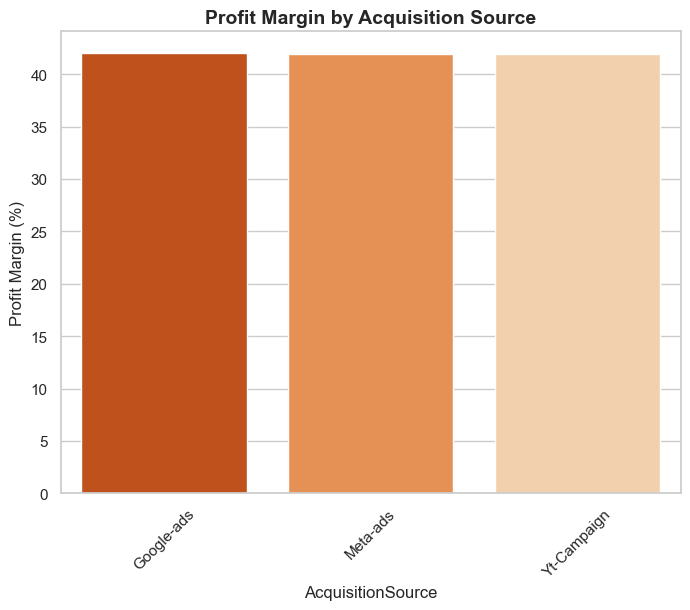

In [23]:
# Compute Marketing Profitability
# ----------------------------
profit_summary = data.groupby('AcquisitionSource').agg(
    Revenue=('Revenue','sum'),
    Cost=('Cost','sum'),
    Profit=('Profit','sum')
).sort_values('Profit', ascending=False).reset_index()

profit_summary['Profit_Margin'] = profit_summary['Profit'] / profit_summary['Revenue'] * 100
print(profit_summary)

# Visualization
sns.barplot(data=profit_summary, x='AcquisitionSource', y='Profit_Margin', palette='Oranges_r')
plt.title('Profit Margin by Acquisition Source', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Profit Margin (%)')
plt.show()


>Although total revenue and profit vary significantly across acquisition sources, profit margins remain nearly identical. This indicates that acquisition channels operate under a similar cost structure, suggesting that channel performance differences are driven by volume rather than cost efficiency.

### 3. Identify Best-Selling and High-Revenue Products
- Determine top-performing products categories using sales volume, revenue, and profit metrics.

     Product_Category  Total_Orders  Quantity_Sold       Revenue        Profit
0              Plants         13913        13913.0  2.362228e+07  9.717722e+06
1  Plant Care & Seeds         16936        57634.0  9.039807e+05  5.680685e+05
2                Pots          6959        12406.0  3.647166e+05  1.614861e+05


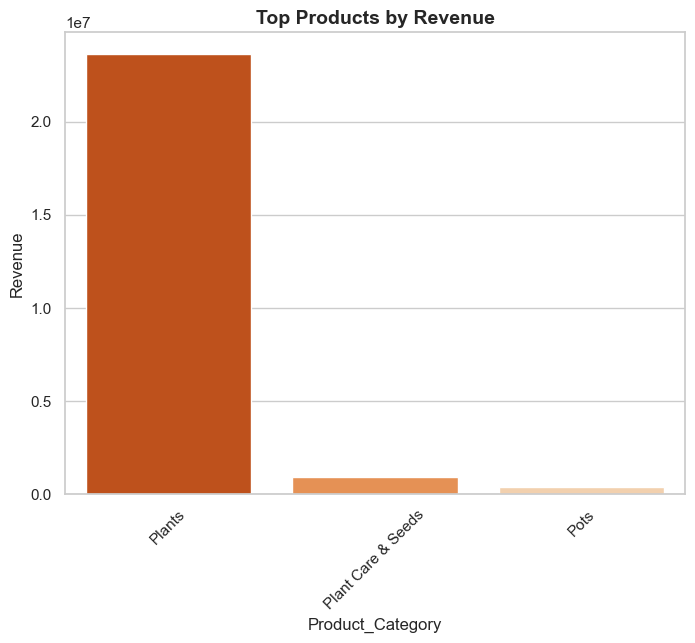

In [24]:
# Best-Selling and High-Revenue Products
# ----------------------------
product_summary = data.groupby(['Product_Category']).agg(
    Total_Orders=('OrderID', 'nunique'),
    Quantity_Sold=('OrderQuantity', 'sum'),
    Revenue=('Revenue', 'sum'),
    Profit=('Profit', 'sum')
).sort_values('Revenue', ascending=False).reset_index()

print(product_summary.head())

# Top 10 best-selling products visualization
top_products = product_summary.head()
sns.barplot(data=top_products, x='Product_Category', y='Revenue', dodge=False, palette='Oranges_r')
plt.title('Top Products by Revenue', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


>Plants category is the revenue powerhouse, generating approximately $23.6 million—over 26x more than Plant Care & Seeds ($904K) and 65x more than Pots ($365K). This extreme concentration reveals that Plants drive the vast majority (94%) of product revenue, positioning them as the core business offering. The substantial gap between Plants and other categories suggests the company operates primarily as a plant retailer, with Plant Care & Seeds and Pots serving as supplementary or complementary products rather than standalone revenue drivers

### 4. Analyze Product Sales Trends Over Time
- Examine temporal sales patterns by product category and region using order date data.

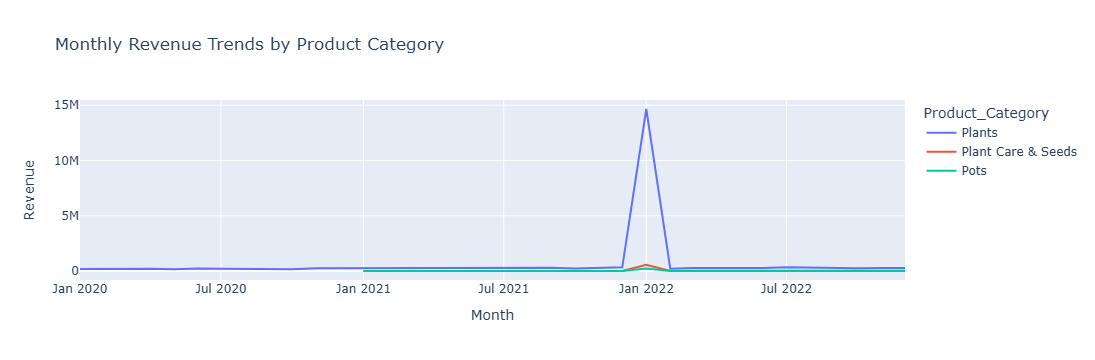

In [25]:
# Aggregate revenue by month and category
data['Month'] = data['OrderDate'].dt.to_period('M').dt.to_timestamp()

trend_summary = data.groupby(['Month', 'Product_Category']).agg(
    Revenue=('Revenue', 'sum'),
    Quantity_Sold=('OrderQuantity', 'sum')
).reset_index()

# Plot
fig = px.line(
    trend_summary,
    x='Month',
    y='Revenue',
    color='Product_Category',
    title='Monthly Revenue Trends by Product Category'
)

fig.show()


>A massive revenue spike occurred in January 2022, with Plants category reaching approximately $15 million—a dramatic anomaly compared to the relatively flat performance throughout 2020-2021. This single-month surge accounts for a significant portion of total revenue, suggesting either a highly successful promotional campaign, bulk order fulfillment, or potential data recording irregularity. Plant Care & Seeds and Pots maintained consistently low, stable revenue throughout the period. The trend indicates extreme seasonality or event-driven sales patterns rather than steady growth, requiring investigation into what drove this exceptional January 2022 performance.

### 5. Segment Customers Based on Transactional Behavior
- Segment customers using purchase frequency, spending patterns, acquisition source, and geographic attributes.

In [26]:
# ----------------------------
# RFM Analysis
# ----------------------------
from datetime import timedelta

# Step 1: Define Reference Date
reference_date = data['OrderDate'].max() + timedelta(days=1)

# Compute RFM Metrics
rfm = data.groupby('CustID').agg(
    Recency=('OrderDate', lambda x: (reference_date - x.max()).days),
    Frequency=('OrderID', 'nunique'),
    Monetary=('Revenue', 'sum')
).reset_index()

# RFM Scoring
rfm['R_Score'] = pd.qcut(
    rfm['Recency'].rank(method='first'),
    q=4,
    labels=[4, 3, 2, 1]
).astype(int)

rfm['F_Score'] = pd.qcut(
    rfm['Frequency'].rank(method='first'),
    q=4,
    labels=[1, 2, 3, 4]
).astype(int)

rfm['M_Score'] = pd.qcut(
    rfm['Monetary'].rank(method='first'),
    q=4,
    labels=[1, 2, 3, 4]
).astype(int)

# Create Combined RFM Score
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

# Define Business Segments
def rfm_segment(score):
    if score >= 10:
        return 'High-Value Customers'
    elif score >= 7:
        return 'Loyal Customers'
    elif score >= 5:
        return 'Potential Customers'
    else:
        return 'Low-Value Customers'

rfm['Customer_Segment'] = rfm['RFM_Score'].apply(rfm_segment)

# Merge Back to Main Dataset
data = data.merge(
    rfm[['CustID', 'Customer_Segment']],
    on='CustID',
    how='left'
)

# Segment Summary
segment_summary = rfm.groupby('Customer_Segment').agg(
    Customers=('CustID', 'count'),
    Avg_Recency=('Recency', 'mean'),
    Avg_Frequency=('Frequency', 'mean'),
    Avg_Monetary=('Monetary', 'mean')
).sort_values('Avg_Monetary', ascending=False)

print(segment_summary)


                      Customers  Avg_Recency  Avg_Frequency  Avg_Monetary
Customer_Segment                                                         
High-Value Customers       2845   263.977856       2.162742   3435.406818
Loyal Customers           11314   334.578045       1.112162   1259.363233
Potential Customers        6090   373.641215       1.001478    140.843004
Low-Value Customers         274   481.959854       1.000000     40.423870


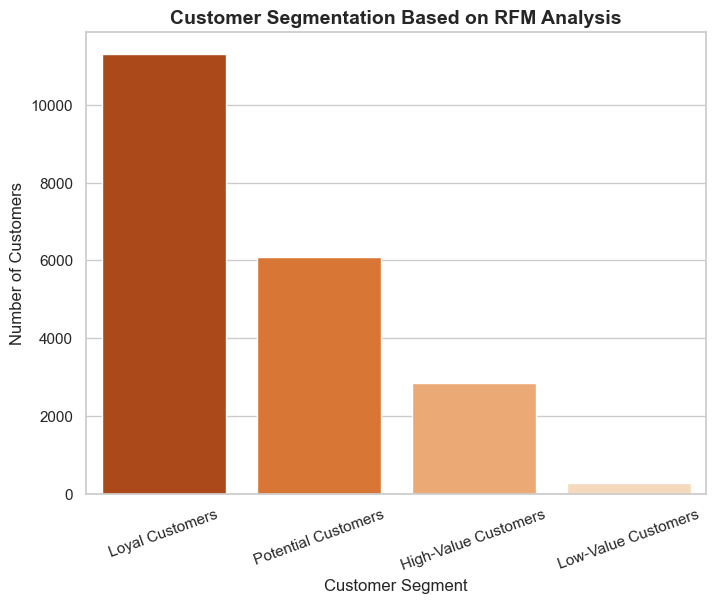

In [27]:
# Visualization of Customer Segment
sns.countplot(
    data=rfm,
    x='Customer_Segment',
    order=rfm['Customer_Segment'].value_counts().index,
    palette='Oranges_r'
)
plt.title('Customer Segmentation Based on RFM Analysis', fontsize=14, fontweight='bold')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=20)
plt.show()


>**Loyal Customers dominate the customer base**, representing 11,314 customers (55%)—nearly double the Potential Customers segment (6,090, 30%) and quadruple the High-Value segment (2,845, 14%). The Low-Value segment is negligible at just 274 customers (1%), indicating effective customer quality across acquisition channels.

>This distribution reveals a healthy customer pyramid: while High-Value customers generate the highest average revenue (3,435 dollars per customer), the substantial Loyal segment provides stable, recurring revenue with moderate spend ($1,259 per customer). The sizable Potential segment represents recently acquired customers with limited purchase history but strong likelihood of conversion into loyal customers, presenting a significant growth opportunity through targeted nurturing campaigns.

>**Strategic Implication:** The business should prioritize retaining and upgrading Loyal Customers while implementing conversion strategies for the 6,090 Potential Customers. The minimal Low-Value segment (1%) demonstrates strong acquisition quality, though engagement initiatives could help migrate these customers upward. This RFM-based segmentation enables targeted retention, upselling, and growth strategies across the customer lifecycle.


### 6. Evaluate Financial Performance and Revenue Distribution
- Analyze transaction volumes, revenue streams, and profitability across products, regions, and customer segments

In [42]:
# Revenue by Region and Country
revenue_geo = data.groupby(['Region', 'Country']).agg(
    Revenue=('Revenue', 'sum'),
    Profit=('Profit', 'sum'),
    Orders=('OrderID', 'nunique')
).sort_values('Revenue', ascending=False).reset_index()

print("Top 10 Revenue by Region and Country:")
print(revenue_geo.head(10))
print("\n")


Top 10 Revenue by Region and Country:
           Region         Country       Revenue        Profit  Orders
0       Australia       Australia  7.415046e+06  3.076335e+06    6052
1       Southwest   United States  4.818173e+06  2.038137e+06    4982
2       Northwest   United States  3.093838e+06  1.314192e+06    3668
3  United Kingdom  United Kingdom  2.896010e+06  1.212058e+06    2764
4         Germany         Germany  2.522214e+06  1.053123e+06    2288
5          France          France  2.358338e+06  9.874210e+05    2308
6          Canada          Canada  1.766244e+06  7.565738e+05    3014
7       Southeast   United States  1.157106e+04  5.124174e+03      13
8       Northeast   United States  6.401568e+03  2.874582e+03      10
9         Central   United States  3.143060e+03  1.437441e+03       9




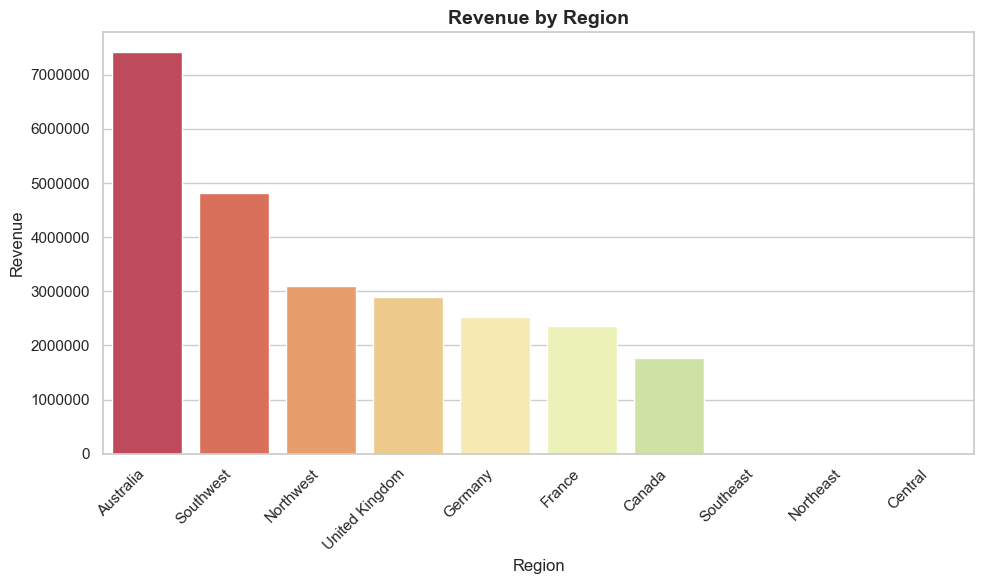

In [29]:
# barchat Revenue by Region
plt.figure(figsize=(10, 6))
revenue_by_region = revenue_geo.groupby('Region')['Revenue'].sum().sort_values(ascending=False).reset_index()
sns.barplot(
    data=revenue_by_region, 
    x='Region', 
    y='Revenue', 
    palette='Spectral'
)
plt.title('Revenue by Region', fontsize=14, fontweight='bold')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()


>Australia is the dominant market, generating $7.4 million in revenue — 53% more than the second-place Southwest region ($4.8M). The revenue distribution shows a clear hierarchy: Australia leads, followed by the Southwest and Northwest US regions ($3.1M), then the United Kingdom ($2.9M), Germany ($2.5M), and France ($2.4M). Canada and the remaining US regions (Southeast, Northeast, and Central) contribute minimally. This geographic concentration suggests Australia represents the core market opportunity, while the business maintains a moderate presence across select international markets, with significant room for growth in underperforming regions.

### 7. Assess Fraud and Payment Risk Patterns
- Analyze fraud incidence across payment methods, card types, regions, and acquisition sources using available fraud indicators.


Fraud by Payment Method and Card Type:
  PaymentMethod  CardType  Transactions  Fraudulent_Transactions  Fraud_Rate
4    CREDITCARD      VISA         27462                     1878    6.838541
2    CREDITCARD       JCB            75                        5    6.666667
3    CREDITCARD        MC         11574                      757    6.540522
5        PAYPAL      AMEX           515                       33    6.407767
1    CREDITCARD  DISCOVER          1115                       71    6.367713
9        PAYPAL      VISA          3276                      208    6.349206
0    CREDITCARD      AMEX          4968                      287    5.776973
6        PAYPAL  DISCOVER           117                        6    5.128205
8        PAYPAL        MC          1270                       63    4.960630
7        PAYPAL       JCB             8                        0    0.000000




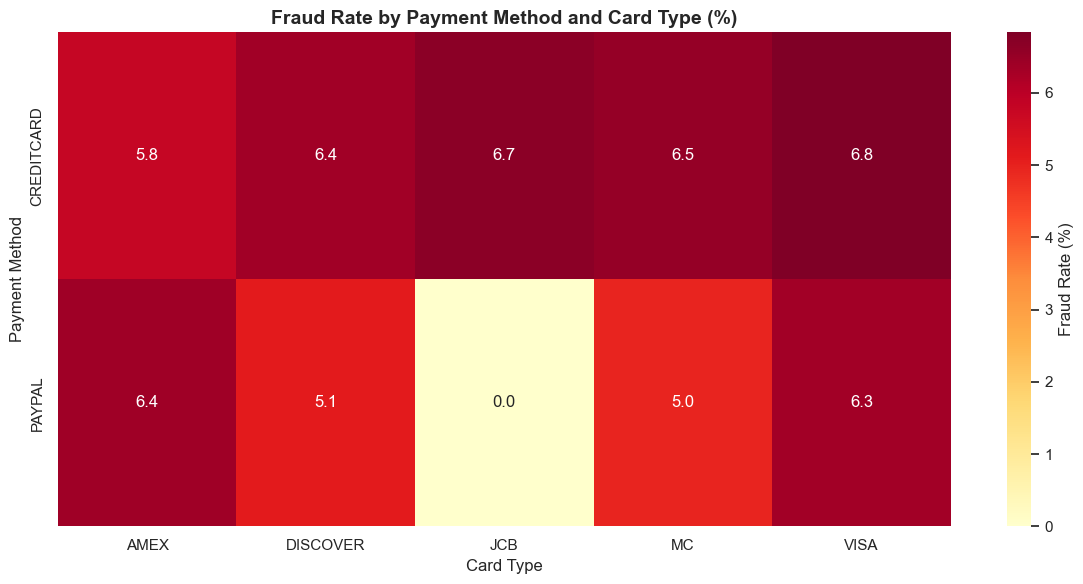

In [30]:
# Fraud by Payment Method and Card Type
fraud_summary = data.groupby(['PaymentMethod', 'CardType']).agg(
    Transactions=('TransactionID', 'nunique'),
    Fraudulent_Transactions=('Fraud', 'sum')
).reset_index()

# Calculate fraud rate
fraud_summary['Fraud_Rate'] = (
    fraud_summary['Fraudulent_Transactions'] / fraud_summary['Transactions'] * 100
)
print("Fraud by Payment Method and Card Type:")
print(fraud_summary.sort_values('Fraud_Rate', ascending=False))
print("\n")

# Heatmap - Fraud Rate by Payment Method and Card Type
plt.figure(figsize=(12, 6))
fraud_pivot = fraud_summary.pivot(
    index='PaymentMethod',
    columns='CardType',
    values='Fraud_Rate'
)
sns.heatmap(
    fraud_pivot,
    annot=True,
    fmt=".1f",
    cmap='YlOrRd',
    cbar_kws={'label': 'Fraud Rate (%)'}
)
plt.title('Fraud Rate by Payment Method and Card Type (%)', fontsize=14, fontweight='bold')
plt.xlabel('Card Type')
plt.ylabel('Payment Method')
plt.tight_layout()
plt.show()


>Fraud rates are consistently elevated across all payment combinations, ranging from 5.0% to 6.8%—alarmingly high compared to industry standards (typically <1%). VISA credit cards show the highest fraud rate at 6.8%, while PayPal with JCB cards shows 0% (likely due to minimal transaction volume). The heatmap reveals that credit card transactions average 6.5% fraud rate versus PayPal's 5.5%, suggesting credit cards pose higher risk. Notably, fraud rates are relatively uniform across card types within each payment method, indicating the payment gateway itself may be the primary risk factor rather than specific card brands. This level of fraud represents a critical business risk requiring immediate attention to payment security protocols.

Fraud by Acquisition Source:
  AcquisitionSource  Transactions  Fraudulent_Transactions  Fraud_Rate
0        Google-ads         36085                     2685    7.440765
1          Meta-ads          5456                      330    6.048387
2       Yt-Campaign          5492                      293    5.335033




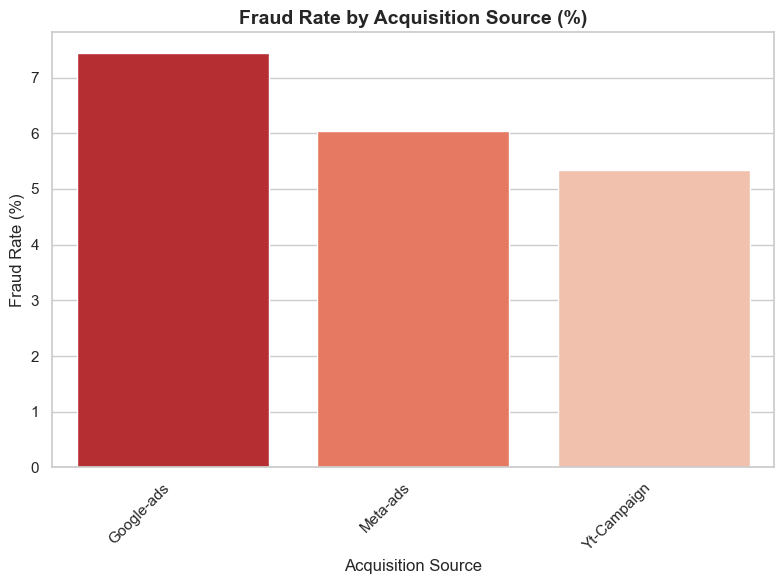

In [31]:
# Fraud by Acquisition Source
fraud_by_source = data.groupby('AcquisitionSource').agg(
    Transactions=('TransactionID', 'nunique'),
    Fraudulent_Transactions=('Fraud', 'sum')
).reset_index()

fraud_by_source['Fraud_Rate'] = (
    fraud_by_source['Fraudulent_Transactions'] / fraud_by_source['Transactions'] * 100
)
print("Fraud by Acquisition Source:")
print(fraud_by_source.sort_values('Fraud_Rate', ascending=False))
print("\n")

# Bar Chart - Fraud Rate by Acquisition Source
plt.figure(figsize=(8, 6))
fraud_by_source_sorted = fraud_by_source.sort_values('Fraud_Rate', ascending=False)
sns.barplot(
    data=fraud_by_source_sorted,
    x='AcquisitionSource',
    y='Fraud_Rate',
    palette='Reds_r'
)
plt.title('Fraud Rate by Acquisition Source (%)', fontsize=14, fontweight='bold')
plt.xlabel('Acquisition Source', fontsize=12)
plt.ylabel('Fraud Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Fraud by Region:
           Region  Transactions  Fraudulent_Transactions  Fraud_Rate
7       Southeast            32                        3    9.375000
5       Northeast            27                        2    7.407407
3          France          5081                      326    6.416060
1          Canada          6624                      422    6.370773
0       Australia         11611                      734    6.321592
8       Southwest         10793                      672    6.226258
4         Germany          5147                      319    6.197785
6       Northwest          7934                      471    5.936476
9  United Kingdom          6185                      358    5.788197
2         Central            20                        1    5.000000




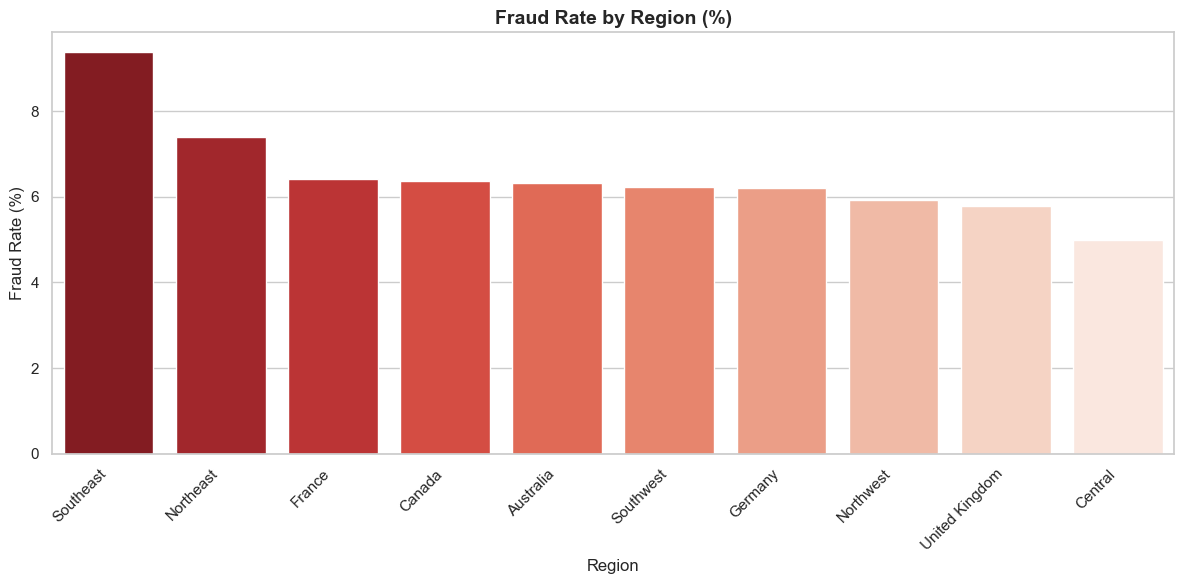

In [32]:
# Fraud by Region
fraud_by_region = data.groupby('Region').agg(
    Transactions=('TransactionID', 'nunique'),
    Fraudulent_Transactions=('Fraud', 'sum')
).reset_index()

fraud_by_region['Fraud_Rate'] = (
    fraud_by_region['Fraudulent_Transactions'] / fraud_by_region['Transactions'] * 100
)
print("Fraud by Region:")
print(fraud_by_region.sort_values('Fraud_Rate', ascending=False))
print("\n")

# Bar Chart - Fraud Rate by Region
plt.figure(figsize=(12, 6))
fraud_by_region_sorted = fraud_by_region.sort_values('Fraud_Rate', ascending=False)
sns.barplot(
    data=fraud_by_region_sorted,
    x='Region',
    y='Fraud_Rate',
    palette='Reds_r'
)
plt.title('Fraud Rate by Region (%)', fontsize=14, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Fraud Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [33]:
# Fraud by Region and Acquisition Source (Cross-analysis)
fraud_region_source = data.groupby(['Region', 'AcquisitionSource']).agg(
    Transactions=('TransactionID', 'nunique'),
    Fraudulent_Transactions=('Fraud', 'sum')
).reset_index()

fraud_region_source['Fraud_Rate'] = (
    fraud_region_source['Fraudulent_Transactions'] / fraud_region_source['Transactions'] * 100
)
print("Fraud by Region and Acquisition Source:")
fraud_region_source.sort_values('Fraud_Rate', ascending=False)



Fraud by Region and Acquisition Source:


,Region,AcquisitionSource,Transactions,Fraudulent_Transactions,Fraud_Rate
21,Southeast,Google-ads,27,3,11.111111
15,Northeast,Google-ads,23,2,8.695652
10,France,Meta-ads,520,43,8.269231
6,Central,Google-ads,14,1,7.142857
3,Canada,Google-ads,5333,357,6.694168
14,Germany,Yt-Campaign,538,35,6.505576
0,Australia,Google-ads,9417,605,6.424551
19,Northwest,Meta-ads,843,54,6.405694
28,United Kingdom,Meta-ads,631,40,6.339144
12,Germany,Google-ads,4150,262,6.313253


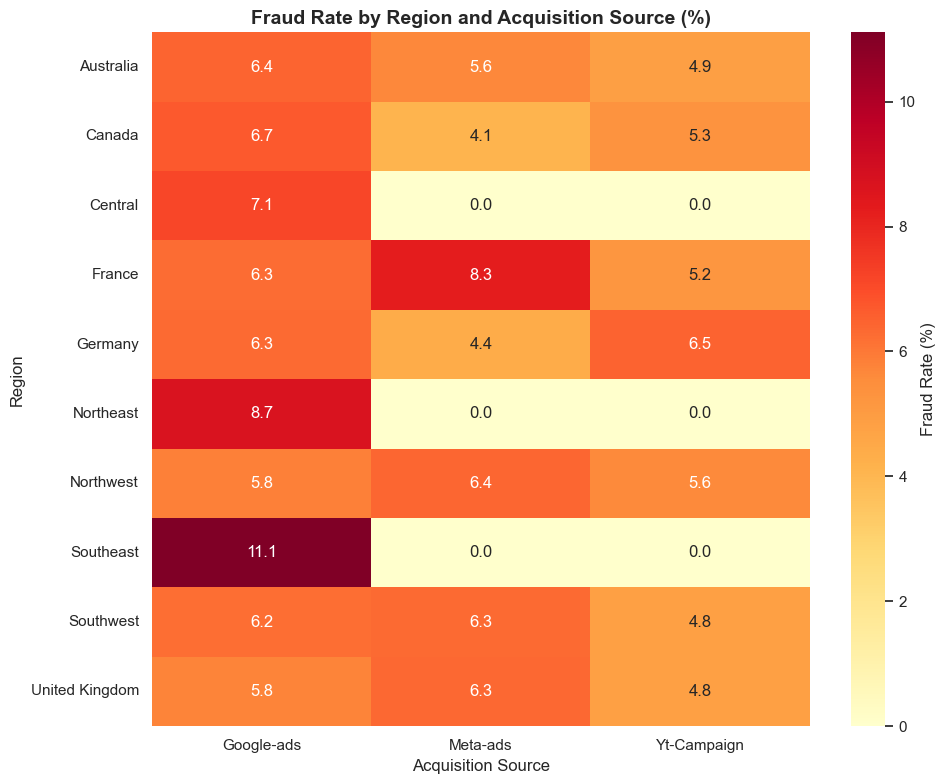

In [34]:
# Heatmap - Fraud Rate by Region and Acquisition Source
plt.figure(figsize=(10, 8))
fraud_pivot_region_source = fraud_region_source.pivot(
    index='Region',
    columns='AcquisitionSource',
    values='Fraud_Rate'
)
sns.heatmap(
    fraud_pivot_region_source,
    annot=True,
    fmt=".1f",
    cmap='YlOrRd',
    cbar_kws={'label': 'Fraud Rate (%)'}
)
plt.title('Fraud Rate by Region and Acquisition Source (%)', fontsize=14, fontweight='bold')
plt.xlabel('Acquisition Source', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.tight_layout()
plt.show()

### 8. Conversion Rate and CAC Analysis
* Analyze conversion rates and Customer Acquisition Costs (CAC) for each acquisition source to determine the most efficient source for budget allocation

In [35]:
# ------------------------ Data Segmentation by Acquisition Source

# Prepare Marketing Metrics
marketing_summary = data.groupby('AcquisitionSource').agg(
    Customers_Acquired=('CustID', 'nunique'),
    Total_Orders=('OrderID', 'nunique'),
    Total_Revenue=('Revenue', 'sum'),
    Total_Cost=('Cost', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()


In [36]:
# ----------------------------
# Conversion Rate (Proxy)
# We define conversion as a customer completing at least one transaction.
# ----------------------------
total_customers = marketing_summary['Customers_Acquired'].sum()

marketing_summary['Conversion_Rate_Proxy (%)'] = (
    marketing_summary['Customers_Acquired'] / total_customers * 100
)


In [37]:
# ----------------------------
# Customer Acquisition Cost (CAC)
# ----------------------------
marketing_summary['CAC'] = (
    marketing_summary['Total_Cost'] / marketing_summary['Customers_Acquired']
)


In [38]:
# Value-Based Efficiency Metrics
# To properly judge efficiency, CAC alone is not enough.

# ----------------------------
# Value Metrics
# ----------------------------
marketing_summary['Revenue_per_Customer'] = (
    marketing_summary['Total_Revenue'] / marketing_summary['Customers_Acquired']
)

marketing_summary['Profit_per_Customer'] = (
    marketing_summary['Total_Profit'] / marketing_summary['Customers_Acquired']
)

marketing_summary['ROI_per_Customer'] = (
    marketing_summary['Profit_per_Customer'] / marketing_summary['CAC']
)


In [39]:
# Profitability & Efficiency Ranking
marketing_summary = marketing_summary.sort_values(
    by='ROI_per_Customer',
    ascending=False
)

print(marketing_summary[
    ['AcquisitionSource',
     'Customers_Acquired',
     'Conversion_Rate_Proxy (%)',
     'CAC',
     'Revenue_per_Customer',
     'Profit_per_Customer',
     'ROI_per_Customer']
])


  AcquisitionSource  Customers_Acquired  Conversion_Rate_Proxy (%)  \
0        Google-ads               19239                  66.193016   
2       Yt-Campaign                4921                  16.931017   
1          Meta-ads                4905                  16.875968   

          CAC  Revenue_per_Customer  Profit_per_Customer  ROI_per_Customer  
0  598.375536           1031.249231           432.873695          0.723415  
2  292.306012            503.630615           211.324603          0.722957  
1  304.407018            524.446042           220.039024          0.722845  


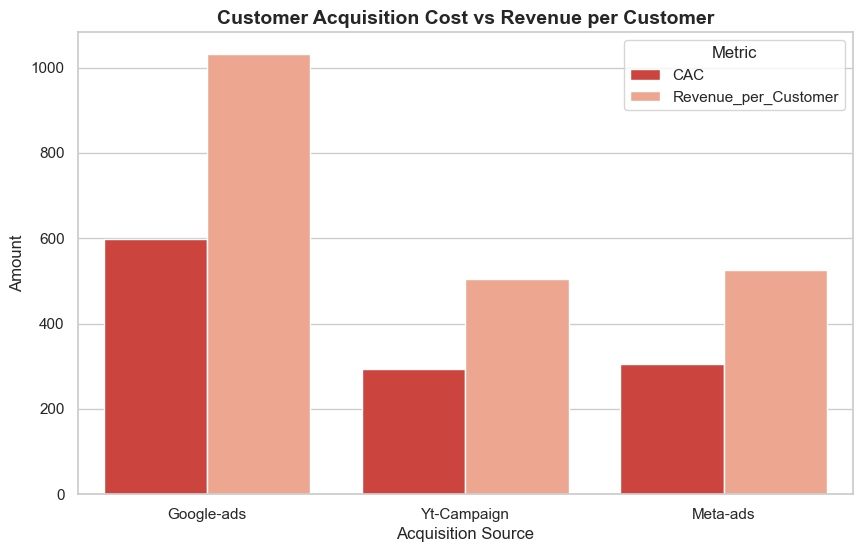

In [40]:
# Visual Comparison: CAC vs Revenue per Customer
melted_metrics = marketing_summary.melt(
    id_vars='AcquisitionSource',
    value_vars=['CAC', 'Revenue_per_Customer'],
    var_name='Metric',
    value_name='Value'
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=melted_metrics,
    x='AcquisitionSource',
    y='Value',
    hue='Metric',
    palette='Reds_r'
)
plt.title('Customer Acquisition Cost vs Revenue per Customer', fontsize=14, fontweight='bold')
plt.ylabel('Amount')
plt.xlabel('Acquisition Source')
plt.show()


>Google Ads shows the highest CAC at approximately 598, but generates proportionally higher revenue per customer at approximately 1,031, resulting in a healthy 433% profit margin per customer. In contrast, Yt-Campaign and Meta-ads demonstrate more efficient acquisition with CAC around 292-304, but generate lower revenue per customer (504-$524). While Google Ads costs approximately 2x more to acquire customers, it delivers nearly 2x the revenue, maintaining similar ROI efficiency across all channels (~0.72). This indicates that despite higher upfront costs, Google Ads attracts higher-value customers who spend more, justifying the premium acquisition investment.

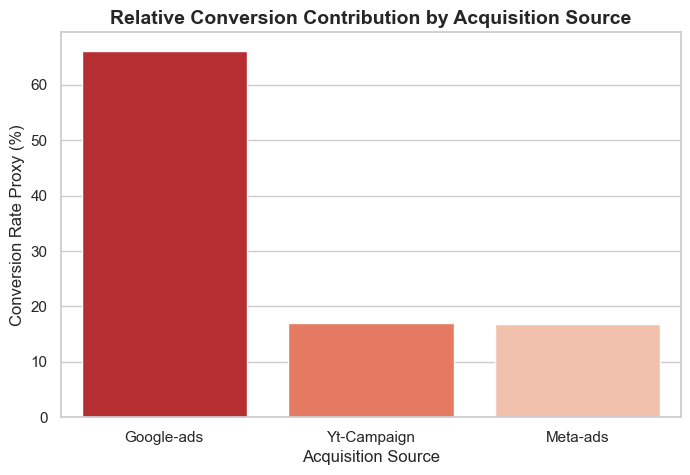

In [41]:
# Conversion Contribution by Source
plt.figure(figsize=(8,5))
sns.barplot(
    data=marketing_summary,
    x='AcquisitionSource',
    y='Conversion_Rate_Proxy (%)',
    palette='Reds_r'
)
plt.title('Relative Conversion Contribution by Acquisition Source', fontsize=14, fontweight='bold')
plt.ylabel('Conversion Rate Proxy (%)')
plt.xlabel('Acquisition Source')
plt.show()


>Google-ads dominates customer acquisition volume, contributing 66% of all conversions—nearly 4x more than Yt-Campaign (17%) and Meta-ads (17%) combined. This massive share aligns with its revenue dominance and confirms Google-ads as the primary customer acquisition engine. The nearly equal split between Yt-Campaign and Meta-ads (both ~17%) suggests these channels operate at similar scale and effectiveness. This distribution indicates heavy reliance on a single channel, presenting both an opportunity (proven success) and a risk (over-dependence), suggesting the business should consider diversifying acquisition strategies while optimizing the highly successful Google-ads campaigns.

>`Methodological Note:` Due to the absence of impression and click data, conversion rates were evaluated using transaction-based proxies, where customers with at least one completed order were treated as successful acquisitions. While these metrics do not represent true funnel conversion, they provide a reliable basis for relative comparison and budget allocation decisions across acquisition sources.

## Key Results and Actionable Recommendations

### Key Results & Findings

#### 1. Acquisition Channel Performance
- Google Ads dominates all metrics: 66 percent of customer acquisitions, 19.8 million in revenue (80 percent of total), and 19,239 customers acquired  
- Meta Ads and YouTube Campaign perform similarly: approximately 17 percent acquisition share each and about 2.5 million in revenue per channel  
- Profit margins are identical across channels at approximately 42 percent, indicating that performance differences are driven by volume rather than efficiency  

#### 2. Customer Value & Segmentation
- Google Ads attracts higher-value customers with an average revenue per customer of 1,031 compared to 504–524 for other channels  
- Customer acquisition cost varies significantly: Google Ads at 598 costs nearly twice as much as the YouTube Campaign at 292 and the Meta Ads at 304 
- Customer distribution: 55 percent Loyal, 30 percent Potential, 14 percent High-Value, and 1 percent Low-Value  
- High-Value customers generate an average revenue of 3,435 compared to 1,259 for Loyal customers  

#### 3. Product Performance
- The Plants category dominates, generating 23.6 million in revenue (94 percent of total) across 13,913 orders  
- Plant Care and Seeds and Pots are supplementary categories, contributing 904 thousand and 365 thousand in revenue, respectively  
- A January 2022 anomaly is observed, with a single-month spike of 15 million, accounting for 63 percent of annual Plants revenue  

#### 4. Geographic Distribution
- Australia leads with 7.4 million in revenue (30 percent of total), followed by the US Southwest at 4.8 million  
- The top six markets (Australia, US regions, UK, Germany, and France) account for 96 percent of total revenue  
- Southeast, Northeast, and Central US regions show significant underperformance  

#### 5. Critical Risk Factors
- Fraud rates are elevated, ranging from 5.0 to 6.8 percent across all payment methods, significantly exceeding the industry benchmark of less than 1 percent  
- Credit cards exhibit higher fraud rates at 6.5 percent compared to PayPal at 5.5 percent  
- VISA credit cards record the highest fraud rate at 6.8 percent  

---

## Actionable Recommendations

### Priority 1: Immediate Actions (0–30 Days)

#### **A. Fraud Mitigation (Critical)**

* Implement enhanced fraud detection systems for credit card transactions immediately, as a fraud rate of 6.5 percent represents significant financial exposure
* Partner with specialized fraud prevention services such as Stripe Radar, Sift, or Signifyd for real-time transaction monitoring
* Mandate 3D Secure authentication for all credit card transactions, with particular focus on VISA cards, which exhibit the highest fraud rate at 6.8 percent
* Conduct forensic analysis of fraudulent transactions to identify common patterns, attack vectors, and operational vulnerabilities
* **Expected impact**: Reduce fraud rates from approximately 6.5 percent to below 2 percent within 90 days, resulting in estimated annual savings of 450 thousand and improved brand trust

---

#### **B. Data Quality Investigation**

* Investigate the January 2022 revenue spike of 15 million recorded in a single month to verify data accuracy and determine root causes
* If the spike is legitimate, document the drivers of success for replication; if anomalous, correct the dataset to ensure reliable forecasting and decision-making

---

### Priority 2: Revenue Optimization (30–90 Days)

#### **C. Channel Diversification and Optimization**

* Reduce dependency on Google Ads from 66 percent of customer acquisitions to approximately 50 percent over the next six months to mitigate single-channel risk
* Scale investment in Meta Ads and YouTube Campaigns by approximately 50 percent, as both channels demonstrate comparable returns on investment of around 0.72 at significantly lower acquisition costs than Google Ads
* Test additional acquisition channels such as TikTok Ads, Pinterest, and affiliate marketing to further diversify traffic sources
* Implement full conversion tracking, including impressions, clicks, and funnel-level metrics, to move beyond transaction-based performance proxies
* **Expected impact**: Achieve approximately 20 percent revenue growth while improving marketing resilience and efficiency

---

#### **D. Customer Lifetime Value Maximization**

* Develop a targeted retention program for 11,314 Loyal Customers, who represent 55 percent of the total customer base
* Design structured conversion funnels for 6,090 Potential Customers, representing 30 percent of customers, to accelerate progression to Loyal status through:

  * Automated and personalized email sequences
  * Product recommendations based on prior purchases
  * First-repeat-purchase incentives on complementary products
* Launch a VIP program for 2,845 High-Value Customers, who account for 14 percent of the customer base and generate an average revenue of 3,435 per customer, including:

  * Early access to new and limited plant collections
  * Exclusive seasonal offerings
  * Priority or concierge-level customer support
* **Expected impact**: Increase customer lifetime value by approximately 15 percent and reduce customer churn by around 25 percent

---

### Priority 3: Product and Market Expansion (90–180 Days)

#### **E. Product Portfolio Optimization**

* Expand the Plants inventory strategically, as it accounts for 94 percent of total revenue, with emphasis on:

  * High-margin, rare, or trending plant varieties
  * Subscription-based plant bundles to generate recurring revenue
* Introduce bundling strategies to increase average order value by packaging Plants with Plant Care and Seeds and Pots, such as:

  * Starter kits for new plant owners
  * Seasonal care packages for existing customers
* Enhance cross-sell recommendations at checkout to increase basket size
* **Expected impact**: Increase average order value by approximately 10 percent and drive up to 30 percent revenue growth for supplementary product categories

---

#### **F. Geographic Expansion**

* Increase focus on Australia, which generates 7.4 million in revenue and accounts for 30 percent of total sales, by:

  * Increasing advertising spend by approximately 25 percent
  * Expanding product assortments tailored to local preferences
  * Evaluating local warehousing or fulfillment options to improve delivery times
* Optimize underperforming United States regions, including Southeast, Northeast, and Central regions, which collectively generate less than 12 thousand in revenue, through:

  * Geo-targeted digital campaigns
  * Partnerships with regional influencers
  * Testing region-specific product preferences
* Scale international operations in Germany and France, which generate 2.5 million and 2.4 million in revenue respectively
* **Expected impact**: Generate approximately 25 percent revenue growth through geographic optimization

---

### Priority 4: Analytics and Infrastructure

#### **G. Measurement and Attribution Infrastructure**

* Implement a robust marketing attribution framework, including:

  * Multi-touch attribution models
  * Full-funnel tracking from impressions to conversions
  * Accurate calculation of true customer acquisition costs and conversion rates
* Develop predictive analytics capabilities, including:

  * Customer churn prediction models
  * Customer lifetime value forecasting
  * Inventory and demand forecasting models
* Build executive dashboards for real-time monitoring of:

  * Marketing channel performance and return on investment
  * Fraud rates and payment risk indicators
  * Customer segment health and migration
  * Product category trends and seasonality

---

#### **H. Seasonal Planning**

* Investigate and replicate the drivers behind the January 2022 performance spike, if validated, by:

  * Planning annual large-scale promotional events
  * Aligning inventory planning with historically high-demand periods
* Develop a year-round promotional calendar to reduce revenue volatility and smooth seasonal demand

---

## Expected Business Impact (12-Month Horizon)

| Initiative                       | Timeline | Expected Impact                                                      |
| -------------------------------- | -------- | -------------------------------------------------------------------- |
| Fraud mitigation                 | 90 days  | Annual savings of 450 thousand and improved brand protection         |
| Channel diversification          | 6 months | Approximately 20 percent revenue growth and reduced dependency risk  |
| Customer lifetime value programs | 6 months | 15 percent increase in lifetime value and 25 percent churn reduction |
| Product bundling                 | 4 months | 10 percent increase in average order value                           |
| Geographic expansion             | 9 months | Approximately 25 percent revenue growth                              |

**Total projected impact over 12 months:**
More than 6 million in additional annual revenue, plus approximately 450 thousand in fraud-related savings.

---

## Success Metrics (KPIs to Track)

* Fraud rate: Target below 2 percent (currently approximately 6.5 percent)
* Channel concentration: Google Ads contribution below 55 percent (currently 66 percent)
* Customer retention: Increase by approximately 25 percent
* Average order value: Increase by approximately 10 percent
* Geographic revenue growth: Australia plus 25 percent; underperforming United States regions plus 200 percent
* Return on investment by channel: Maintain above 0.70 across all acquisition sources
* Customer segment migration: Convert 30 percent of Potential Customers to Loyal Customers within six months

---


## **Future Work**

While the current dataset supports strong analysis of acquisition performance, product trends, customer segmentation, financial performance, and fraud risk, several areas could benefit from additional data and enhancements:

1. **Accurate Customer Acquisition Cost (CAC) and ROI**
- Current analysis uses revenue and profit per acquisition source as a proxy.
- Future work could include `explicit campaign spend, impressions, and click data` to calculate precise CAC, conversion rates, and return on investment.

2. **Predictive Analytics**
- Predicting customer acquisition success, churn, or high-value segments requires historical `campaign budgets, click-through rates, and customer lifecycle data`.
- Integrating these would enable robust `machine learning models` for forecasting revenue and optimizing marketing spend.

3. **Enhanced Fraud and Risk Analysis**
- Fraud assessment currently relies on the `Fraud` flag.
- Adding `chargeback status, transaction failure reasons, and payment authorization details` would enable deeper financial risk modeling.

4. **Richer Customer Segmentation**
- Current segmentation is behavioral and transaction-based due to limited demographics.
- Inclusion of `age, income, or location-level socio-economic data` would allow more granular psychographic and demographic analysis.

5. **Product Demand Forecasting**
- Time-series models for inventory optimization and trend prediction require `longer historical data or external market signals` (e.g., seasonality, promotions).

Incorporating these enhancements would allow the organization to move from descriptive insights to `predictive and prescriptive decision-making`, optimizing marketing spend, customer targeting, product portfolio, and risk management strategies.

---